In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='pastel')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [2]:
df_torax = pd.read_csv("../data/processed/df_procesada_112103.csv", sep=";")
df_torax["DIAGNOSTICO1"] = df_torax["DIAGNOSTICO1"].str.replace(".", "", regex=False)

/var/folders/wy/2slj_t7s2vz19v2h2926qb340000gn/T/ipykernel_86051/977106801.py:1: DtypeWarning: Columns (85,86,88,90,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_torax = pd.read_csv("../data/processed/df_procesada_112103.csv", sep=";")


In [3]:
df_pais = pd.read_csv("../data/processed/df_procesada.csv", sep=";")
df_pais["DIAGNOSTICO1"] = df_pais["DIAGNOSTICO1"].str.replace(".", "", regex=False)

/var/folders/wy/2slj_t7s2vz19v2h2926qb340000gn/T/ipykernel_86051/241678524.py:1: DtypeWarning: Columns (1,14,24,25,26,27,28,29,30,31,32,33,37,41,43,47,51,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,101,105,113,123,124,126,127,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pais = pd.read_csv("../data/processed/df_procesada.csv", sep=";")


In [4]:
comparacion_pesos = pd.concat([df_pais.groupby("ANIO_EGRESO")["IR_29301_PESO"].mean(), df_torax.groupby("ANIO_EGRESO")["IR_29301_PESO"].mean()], axis=1)

In [5]:
comparacion_pesos

,IR_29301_PESO,IR_29301_PESO
ANIO_EGRESO,,
2019.0,0.844829,1.568369
2020.0,1.006421,2.304669
2021.0,1.105357,2.666833
2022.0,0.973859,2.373713
2023.0,0.960288,2.374888


<Axes: xlabel='ANIO_EGRESO'>

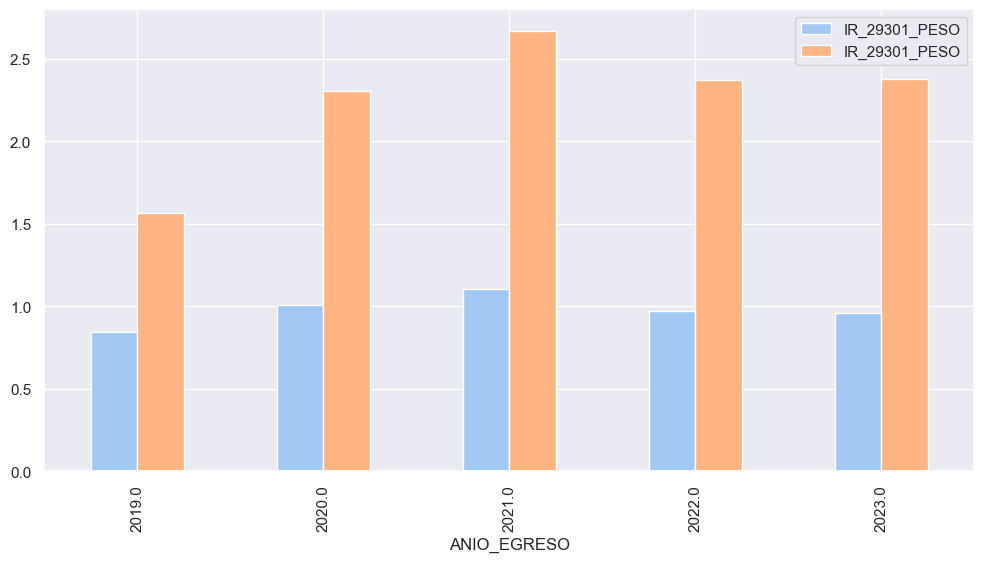

In [6]:
comparacion_pesos.plot(kind="bar")

In [7]:
DIAGS_CONGENITAS = [
    "Q201",
    "Q202",
    "Q203",
    "Q204",
    "Q205",
    "Q206",
    "Q208",
    "Q209",
    "Q210",
    "Q211",
    "Q212",
    "Q213",
    "Q214",
    "Q218",
    "Q220",
    "Q221",
    "Q222",
    "Q223",
    "Q224",
    "Q225",
    "Q228",
    "Q230",
    "Q231",
    "Q233",
    "Q240",
    "Q241",
    "Q244",
    "Q245",
    "Q246",
    "Q248",
    "Q249",
    "Q250",
    "Q251",
    "Q253",
    "Q254",
    "Q255",
    "Q256",
    "Q257",
    "Q258",
    "Q259",
    "Q264",
    "Q268",
    "Q272",
    "Q273",
    "Q288",
    "Q289",
    "Q311",
    "Q320",
    "Q321",
    "Q330",
    "Q331",
    "Q332",
    "Q334",
    "Q338",
    "Q341",
    "Q348",
    "Q678",
    "Q765",
    "Q766",
    "Q767",
    "Q768",
    "Q769",
    "Q780",
    "Q790",
    "Q798",
    "Q839",
    "Q850",
    "Q858",
    "Q859",
    "Q874",
    "Q893",
]

# Reemplaza diagnosticos de congenitas
df_torax["DIAGNOSTICO1"] = df_torax["DIAGNOSTICO1"].replace(DIAGS_CONGENITAS, "QXXX")

In [56]:
df_congenita = df_torax.query("DIAGNOSTICO1 == 'QXXX'")

In [57]:
SERVICIOS_GES_CONGENITAS = [
    "ARICA",
    "DEL RELONCAVÍ",
    "IQUIQUE",
    "ATACAMA",
    "METROPOLITANO ORIENTE",
    "METROPOLITANO SUR",
    "CHILOÉ",
    "DEL RELONCAVÍ",
    "OSORNO",
    "AYSEN",
    "MAGALLANES",
]

In [58]:
df_congenita["PERTENECE_A_RED_GES"] = np.where(
    df_congenita["SERVICIO_SALUD"].isin(SERVICIOS_GES_CONGENITAS), "Si", "No"
)

/var/folders/wy/2slj_t7s2vz19v2h2926qb340000gn/T/ipykernel_86051/1073623221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_congenita["PERTENECE_A_RED_GES"] = np.where(


In [59]:
resumen_congenitas = df_congenita.groupby(["ANIO_EGRESO", "PERTENECE_A_RED_GES"]).size().unstack()
resumen_congenitas.loc["Total"] = resumen_congenitas.sum()
resumen_congenitas["%"] = round((
    resumen_congenitas["No"] / (resumen_congenitas["No"] + resumen_congenitas["Si"])
) * 100, 1)

In [60]:
resumen_congenitas

PERTENECE_A_RED_GES,No,Si,%
ANIO_EGRESO,,,
2019,80,52,60.6
2020,29,36,44.6
2021,69,66,51.1
2022,78,47,62.4
2023,74,57,56.5
Total,330,258,56.1


In [63]:
resumen_congenitas_extenso = (
    df_congenita.groupby(["ANIO_EGRESO", "PERTENECE_A_RED_GES", "Nombre Región", "SERVICIO_SALUD"])
    .size()
    .to_frame(name="n_egresos")
)

In [64]:
with pd.ExcelWriter("../data/interim/resumen_congenitas.xlsx") as file:
    resumen_congenitas.to_excel(file, sheet_name="resumido")
    resumen_congenitas_extenso.to_excel(file, sheet_name="extenso")